In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
import pandas as pd
data = pd.read_csv('datos.csv')
data

,x_1,x_2,y
0,-1.851357e+14,3.565394e+13,0
1,5.715585e+14,-8.484241e+13,1
2,5.175931e+14,-1.231538e+14,1
3,5.966117e+14,-1.778714e+14,1
4,4.207345e+14,-1.175593e+14,1
5,6.815413e+14,-1.852335e+14,1
6,6.028134e+14,-1.889506e+14,1
7,-2.068355e+13,-1.101451e+14,0
8,-2.232456e+14,8.320738e+13,0
9,-1.223650e+14,8.294375e+13,0


In [13]:
from sklearn.model_selection import train_test_split

X = data.values[:,:2]
y = data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

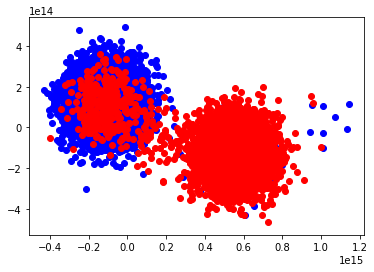

In [14]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

In [16]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

In [18]:
predictions = classifier.predict(X_test)

In [19]:
confusion_matrix(y_test, predictions)

array([[2334,  100],
       [ 126, 2356]], dtype=int64)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [23]:
search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_estimators': [500, 1000, 2000], 'learning_rate': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
print(search.best_params_)

{'learning_rate': 0.01, 'n_estimators': 1000}


In [25]:
learning_rate = search.best_params_['learning_rate']
n_estimators = search.best_params_['n_estimators']
clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=0)
clf.fit(X_train, y_train)
print('Score is: ',clf.score(X_test,y_test))

Score is:  0.9534174125305126


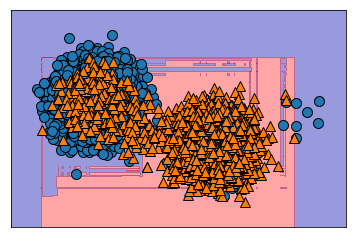

In [27]:
import mglearn
mglearn.plots.plot_2d_separator(clf,X_train,fill=True,alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)


In [28]:
confusion_matrix(y_test, predictions)

array([[2334,  100],
       [ 126, 2356]], dtype=int64)

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test,clf.predict(X_test))

0.953634338935007

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,clf.predict(X_test))

0.9534626301979015

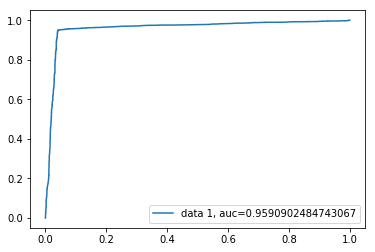

In [31]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()